<a href="https://colab.research.google.com/github/ye-bhee-theek-ha/Student-Grade-Predictor/blob/main/StudentGradePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Import and Cleanup**

In [ ]:
import pandas as pd

StudentData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/student grade predictor/student.csv")

StudentData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
# removing unnecessary data
StudentData = StudentData.drop(['Fjob','Mjob','Fedu','Medu','address','famsize','Pstatus','failures','studytime','traveltime','guardian','reason','famsup','paid','romantic','internet','higher','nursery','goout','freetime','Dalc','Walc','Walc','health','famrel'], axis=1)
StudentData

,school,sex,age,schoolsup,activities,absences,G1,G2,G3
0,GP,F,18,yes,no,4,0,11,11
1,GP,F,17,no,no,2,9,11,11
2,GP,F,15,yes,no,6,12,13,12
3,GP,F,15,no,yes,0,14,14,14
4,GP,F,16,no,no,0,11,13,13
...,...,...,...,...,...,...,...,...,...
644,MS,F,19,no,yes,4,10,11,10
645,MS,F,18,no,no,4,15,15,16
646,MS,F,18,no,yes,6,11,12,9
647,MS,M,17,no,no,6,10,10,10


In [ ]:
StudentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   schoolsup   649 non-null    object
 4   activities  649 non-null    object
 5   absences    649 non-null    int64 
 6   G1          649 non-null    int64 
 7   G2          649 non-null    int64 
 8   G3          649 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 45.8+ KB


In [ ]:
# converting 0-20 grade range to 0-12 (A+ to F)


Schoolsup=list()
Activities=list()
Sex=list()
School=list()
G1=list()
G2=list()
G3=list()

for i in range(len(StudentData)):
  if(StudentData.loc[i]['schoolsup'] == 'yes'):
     Schoolsup.append(1)
  else:
     Schoolsup.append(0)

  if(StudentData.loc[i]['activities'] == 'yes'):
     Activities.append(1)
  else:
     Activities.append(0)

  if(StudentData.loc[i]['sex'] == 'M'):
     Sex.append(1)
  else:
     Sex.append(0)

  if(StudentData.loc[i]['school'] == 'GP'):
     School.append(1)
  else:
     School.append(0)

  G1.append(float((StudentData.loc[i]['G1']/20)) * 4)
  G2.append(float((StudentData.loc[i]['G2']/20)) * 4)
  G3.append(float((StudentData.loc[i]['G3']/20)) * 4)


StudentData['schoolsup'] = Schoolsup
StudentData['activities'] = Activities
StudentData['sex'] = Sex
StudentData['school'] = School
StudentData['G1'] = G1
StudentData['G2'] = G2
StudentData['G3'] = G3

StudentData

,school,sex,age,schoolsup,activities,absences,G1,G2,G3
0,1,0,18,1,0,4,0.0,2.2,2.2
1,1,0,17,0,0,2,1.8,2.2,2.2
2,1,0,15,1,0,6,2.4,2.6,2.4
3,1,0,15,0,1,0,2.8,2.8,2.8
4,1,0,16,0,0,0,2.2,2.6,2.6
...,...,...,...,...,...,...,...,...,...
644,0,0,19,0,1,4,2.0,2.2,2.0
645,0,0,18,0,0,4,3.0,3.0,3.2
646,0,0,18,0,1,6,2.2,2.4,1.8
647,0,1,17,0,0,6,2.0,2.0,2.0


**Data prep for Modeling**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y=StudentData['G3']
x=StudentData.drop('G3',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 8)
(65, 8)
(584,)
(65,)


# Plotting

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-64-d9d35b5cfdae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(StudentData['G3'])


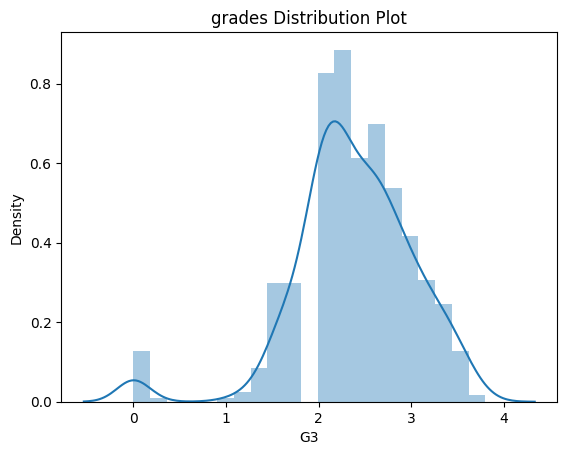

In [ ]:
plt.title('grades Distribution Plot')
sns.distplot(StudentData['G3'])
plt.show()

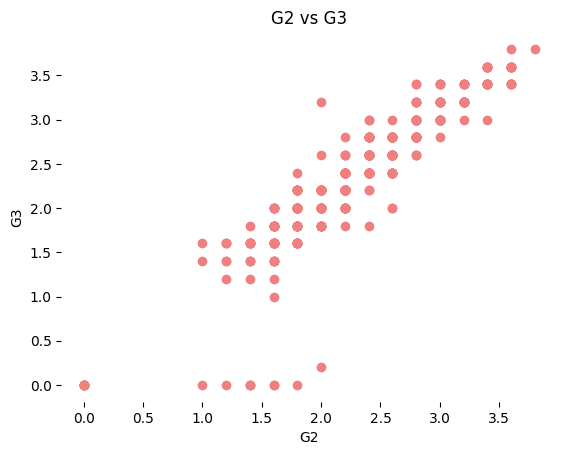

In [ ]:
plt.scatter(StudentData['G2'], StudentData['G3'], color = 'lightcoral')
plt.title('G2 vs G3')
plt.xlabel('G2')
plt.ylabel('G3')
plt.box(False)
plt.show()

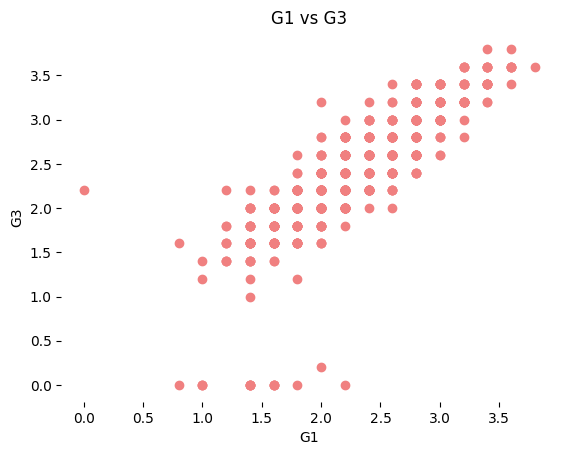

In [ ]:
plt.scatter(StudentData['G1'], StudentData['G3'], color = 'lightcoral')
plt.title('G1 vs G3')
plt.xlabel('G1')
plt.ylabel('G3')
plt.box(False)
plt.show()

# **Defining Model**

In [ ]:
regressor = LinearRegression()

X_train = np.array(X_train)
y_train = np.array(y_train)

regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_test = regressor.predict(X_test)

res = np.array(y_test)


for i in range(0, y_test.size):
  print(y_pred_test[i], res[i], sep=" => ")

3.128914396015834 => 3.0
2.7800790894623413 => 2.6
1.6520044991434262 => 2.0
3.2879390321977664 => 3.2
3.6982862280797306 => 3.6
2.652159381307243 => 2.8
2.0386600006405065 => 2.0
2.8329300613565223 => 2.8
2.1718981909672053 => 2.2
1.7905221368603927 => 1.6
2.191515120996264 => 2.2
2.1879081912413207 => 2.2
2.5012544825352925 => 2.6
2.4430311745738273 => 2.2
2.721370315300475 => 2.6
2.209389054886422 => 2.2
2.849324236900531 => 3.0
1.90352055272099 => 2.0
1.5617887892358002 => 1.2
2.401417133047759 => 2.4
2.480389730123622 => 2.4
1.9960251937064881 => 2.2
2.371128640520152 => 2.6
2.5283125775797455 => 2.4
2.0415444333148356 => 2.0
2.971952157787517 => 3.2
2.6488277448325954 => 2.4
1.6352695911205093 => 1.4
2.0140862551621344 => 2.0
2.498673676331685 => 2.8
1.627365980209875 => 2.0
3.508112923033331 => 3.4
1.9574857155071475 => 2.0
2.320859299149843 => 2.2
1.7843226117639606 => 1.8
2.701269006617989 => 2.4
1.389529152724521 => 1.4
1.8923144628463981 => 2.4
2.4847601036077505 => 2.8
1.95

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
MAE = mean_absolute_error(y_test, y_pred_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
R2 = r2_score(y_test, y_pred_test)

print("Mean Absolute Error (MAE):", MAE)
print("Root Mean Squared Error (RMSE):", RMSE)
print("R-squared (R2) Score:", R2)

Mean Absolute Error (MAE): 0.1744950360769252
Root Mean Squared Error (RMSE): 0.26194321710129315
R-squared (R2) Score: 0.8035088371901027


In [ ]:
regressor.predict(X_train[0].reshape(1, -1)), X_train[0].reshape(1, -1)



(array([3.1083129]), array([[ 1.,  1., 17.,  0.,  1.,  8.,  3.,  3.]]))

# Model Export

In [ ]:
import joblib

joblib.dump(regressor, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [ ]:
# model = keras.Sequential([
#    keras.layers.Dense(20, activation='relu', input_shape=[8]),
#    keras.layers.Dense(10, activation='relu'),
#    keras.layers.Dense(5, activation='relu'),
#    keras.layers.Dense(1 , activation='linear')
# ])

# model.compile(optimizer= "adam", loss = "MeanSquaredError", metrics = ["accuracy"])

# history = model.fit(X_train, y_train, epochs = 7)

In [ ]:
# model.evaluate(X_test, y_test)